In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

/home/anson/.local/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Loading Data

In [7]:
# epsilon_pimu = 1/100


# modes_dt = {0: {'mode': './features/IDEA_card_DsTauNu_10Noise.root', 'yields': 5.17e5}, 
#             1: {'mode': './features/IDEA_card_DsMuNu_10Noise.root', 'yields': 8.94e6},
#             2: {'mode': './features/IDEA_card_DsstarTauNu_10Noise.root', 'yields': 8.16e5}, 
#             3: {'mode': './features/IDEA_card_DsstarMuNu_10Noise.root', 'yields': 1.89e7},
#             4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
#             5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
#             6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
#            }


In [8]:
# def load_train_test(modes_dt, size=0.5):
#     np.random.seed(9)
#     df_train = pd.DataFrame()
#     df_test = pd.DataFrame()
#     num_lt = []
    
#     # loop over different modes
#     for i, (k, v) in enumerate(modes_dt.items()):
#         file = uproot.open(v['mode'])
# #         df_i = file['t'].pandas.df()    
#         df_i = pd.DataFrame(np.array(file['t']['features'].array()))
#         df_i['target'] = i    # add the target label
#         df_i['weight'] = v['yields']/len(df_i)
#         num_lt.append(len(df_i))

#         # shuffle the index for training and testing sets
#         idx = df_i.index.tolist()
#         np.random.shuffle(idx)
        
#         # cut according to the fraction
#         cut = int(np.ceil(len(idx) * size))
#         df_train_i = df_i.loc[idx[:cut]]
#         df_test_i = df_i.loc[idx[cut:]]
        
#         # Put to the global dataframs
#         df_train = pd.concat([df_train, df_train_i])
#         df_test = pd.concat([df_test, df_test_i])
    
#     df_train.reset_index(drop=True, inplace=True)
#     df_test.reset_index(drop=True, inplace=True)
    
#     print('train size: {} ({:.2f}%); test size: {} ({:.2f}%)'.format(len(df_train), 100*len(df_train)/(len(df_train)+len(df_test)), len(df_test), 100*len(df_test)/(len(df_train)+len(df_test))))
#     print('data points per mode: ',num_lt)
#     return df_train, df_test

    

In [9]:
# tr_te_split = 1
# df_train, df_test = load_train_test(modes_dt, tr_te_split)
# # df_test, df_train = load_train_test(modes_dt, tr_te_split)
# # make a copy
# df_train_o, df_test_o = df_train.copy(), df_test.copy()

In [10]:
# df_tau = df_train[df_train.target==2]
# df_mu = df_train[df_train.target==3]

In [11]:

# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[0, 5]
# bins_ = 20

# ax1.margins(y=0.5)


# ax1.hist(df_tau[df_tau.isDsPho==1]['EPhoTrue'], weights=[1/len(df_tau[df_tau.isDsPho==1])] * len(df_tau[df_tau.isDsPho==1]), bins=bins_, range=range_, histtype='step', lw=3, label=r'Tagged $B_s^0\to D_s^{*-} \tau^+\nu$', alpha=0.5, color='C0');
# ax1.hist(df_tau[df_tau.isDsPho==0]['EPhoTrue'], weights=[1/len(df_tau[df_tau.isDsPho==0])] * len(df_tau[df_tau.isDsPho==0]), bins=bins_, range=range_, histtype='step', lw=3, label=r'Untagged $B_s^0\to D_s^{*-} \tau^+\nu$', alpha=0.5, color='C1');
# ax1.hist(df_mu[df_mu.isDsPho==1]['EPhoTrue'], weights=[1/len(df_mu[df_mu.isDsPho==1])] * len(df_mu[df_mu.isDsPho==1]), bins=bins_, range=range_, histtype='step', lw=3, label=r'Tagged $B_s^0\to D_s^{*-} \mu^+\nu$', alpha=0.5, color='C0', linestyle='--');
# ax1.hist(df_mu[df_mu.isDsPho==0]['EPhoTrue'], weights=[1/len(df_mu[df_mu.isDsPho==0])] * len(df_mu[df_mu.isDsPho==0]), bins=bins_, range=range_, histtype='step', lw=3, label=r'Untagged $B_s^0\to D_s^{*-} \mu^+\nu$', alpha=0.5, color='C1', linestyle='--');


# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$E_\gamma$ [GeV]', fontsize=20)
# ax1.set_yticks([])
# ax1.legend(loc=1, fontsize=20)
# # ax1.axvline(c3, color='red', lw=3)

# # f.savefig('./figures/Dsstar_angularsep_2')

In [12]:

# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[0, 2]
# bins_ = 20

# ax1.margins(y=0.1)


# ax1.hist(df_tau[df_tau.isDsPho==1]['DeltaRDsPhoTrue'], weights=[1/len(df_tau[df_tau.isDsPho==1])] * len(df_tau[df_tau.isDsPho==1]), bins=bins_, range=range_, histtype='step', lw=3, label=r'Tagged $B_s^0\to D_s^{*-} \tau^+\nu$', alpha=0.5, color='C0');
# ax1.hist(df_tau[df_tau.isDsPho==0]['DeltaRDsPhoTrue'], weights=[1/len(df_tau[df_tau.isDsPho==0])] * len(df_tau[df_tau.isDsPho==0]), bins=bins_, range=range_, histtype='step', lw=3, label=r'Untagged $B_s^0\to D_s^{*-} \tau^+\nu$', alpha=0.5, color='C1');
# ax1.hist(df_mu[df_mu.isDsPho==1]['DeltaRDsPhoTrue'], weights=[1/len(df_mu[df_mu.isDsPho==1])] * len(df_mu[df_mu.isDsPho==1]), bins=bins_, range=range_, histtype='step', lw=3, label=r'Tagged $B_s^0\to D_s^{*-} \mu^+\nu$', alpha=0.5, color='C0', linestyle='--');
# ax1.hist(df_mu[df_mu.isDsPho==0]['DeltaRDsPhoTrue'], weights=[1/len(df_mu[df_mu.isDsPho==0])] * len(df_mu[df_mu.isDsPho==0]), bins=bins_, range=range_, histtype='step', lw=3, label=r'Untagged $B_s^0\to D_s^{*-} \mu^+\nu$', alpha=0.5, color='C1', linestyle='--');


# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$\Delta R_{D_s\gamma}$', fontsize=20)
# ax1.set_yticks([])
# ax1.legend(loc=1, fontsize=20)
# # ax1.axvline(c3, color='red', lw=3)

# # f.savefig('./figures/Dsstar_photonTag')

In [13]:
# df_tau.correctPhoton.sum()/len(df_tau)

In [14]:
# df_mu.correctPhoton.sum()/len(df_mu)

In [15]:
epsilon_pimu = 1/100


modes_dt = {0: {'mode': './features/IDEA_card_DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/IDEA_card_DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/IDEA_card_DsstarTauNu_10Noise.root', 'yields': 8.16e5}, 
            3: {'mode': './features/IDEA_card_DsstarMuNu_10Noise.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }


modes_dt0 = {0: {'mode': './features/IDEA_card_DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/IDEA_card_DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/IDEA_card_DsstarTauNu_10Noise_0Alpha.root', 'yields': 8.16e5}, 
            3: {'mode': './features/IDEA_card_DsstarMuNu_10Noise_0Alpha.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }

modes_dt01 = {0: {'mode': './features/IDEA_card_DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/IDEA_card_DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/IDEA_card_DsstarTauNu_10Noise_01Alpha.root', 'yields': 8.16e5}, 
            3: {'mode': './features/IDEA_card_DsstarMuNu_10Noise_01Alpha.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }

modes_dt05 = {0: {'mode': './features/IDEA_card_DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/IDEA_card_DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/IDEA_card_DsstarTauNu_10Noise_05Alpha.root', 'yields': 8.16e5}, 
            3: {'mode': './features/IDEA_card_DsstarMuNu_10Noise_05Alpha.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }

modes_dt2 = {0: {'mode': './features/IDEA_card_DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/IDEA_card_DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/IDEA_card_DsstarTauNu_10Noise_2Alpha.root', 'yields': 8.16e5}, 
            3: {'mode': './features/IDEA_card_DsstarMuNu_10Noise_2Alpha.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }


In [16]:

df_train0, df_test0 = load_train_test(modes_dt0, tr_te_split)
df_train01, df_test01 = load_train_test(modes_dt01, tr_te_split)
df_train05, df_test05 = load_train_test(modes_dt05, tr_te_split)
df_train2, df_test2 = load_train_test(modes_dt2, tr_te_split)

train size: 99403 (100.00%); test size: 0 (0.00%)
data points per mode:  [1555, 10094, 849, 2647, 2374, 7623, 74261]
train size: 99403 (100.00%); test size: 0 (0.00%)
data points per mode:  [1555, 10094, 849, 2647, 2374, 7623, 74261]
train size: 99403 (100.00%); test size: 0 (0.00%)
data points per mode:  [1555, 10094, 849, 2647, 2374, 7623, 74261]
train size: 99403 (100.00%); test size: 0 (0.00%)
data points per mode:  [1555, 10094, 849, 2647, 2374, 7623, 74261]


In [17]:
df_tau0 = df_train0[df_train0.target==2]
df_mu0 = df_train0[df_train0.target==3]

df_tau01 = df_train01[df_train01.target==2]
df_mu01 = df_train01[df_train01.target==3]

df_tau05 = df_train05[df_train05.target==2]
df_mu05 = df_train05[df_train05.target==3]

df_tau2 = df_train2[df_train2.target==2]
df_mu2 = df_train2[df_train2.target==3]


In [18]:
print("{:.4f}\n{:.4f}\n{:.4f}\n{:.4f}\n{:.4f}\n".format(
df_tau0.correctPhoton.sum()/len(df_tau0), \
df_tau01.correctPhoton.sum()/len(df_tau01), \
df_tau05.correctPhoton.sum()/len(df_tau05), \
df_tau.correctPhoton.sum()/len(df_tau), \
df_tau2.correctPhoton.sum()/len(df_tau2)))


0.3380
0.3369
0.3310
0.3251
0.3168



In [19]:
print("{:.4f}\n{:.4f}\n{:.4f}\n{:.4f}\n{:.4f}\n".format(
df_mu0.correctPhoton.sum()/len(df_mu0), \
df_mu01.correctPhoton.sum()/len(df_mu01), \
df_mu05.correctPhoton.sum()/len(df_mu05), \
df_mu.correctPhoton.sum()/len(df_mu), \
df_mu2.correctPhoton.sum()/len(df_mu2)))


0.3241
0.3230
0.3207
0.3173
0.3079



In [20]:
# alpha   photon tag eff.
# tau:
# 0       0.3394
# 0.1     0.3383
# 0.5     0.3326
# 1       0.3257
# 2       0.3165

# mu:
# 0       0.3206
# 0.1     0.3195
# 0.5     0.3173
# 1       0.3139
# 2       0.3047


In [21]:
df_train_ = df_train[(df_train.target<=3)]
df_train2_ = df_train2[(df_train2.target<=3)]
df_train05_ = df_train05[(df_train05.target<=3)]
df_train01_ = df_train05[(df_train01.target<=3)]
df_train0_ = df_train05[(df_train0.target<=3)]

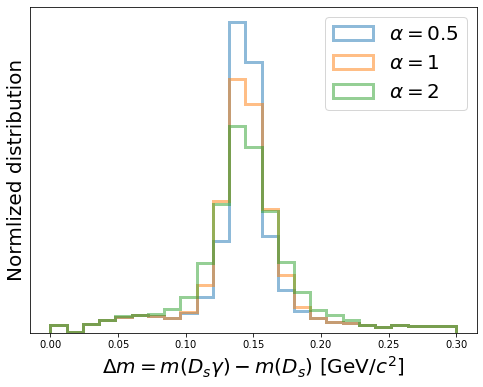

In [37]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[0, 0.3]
bins_ = 25

# ax1.hist(df_train01_['DeltaM'], weights=df_train01_['weight']/(df_train01_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'$\alpha=0.5$', alpha=0.5);
ax1.hist(df_train05_['DeltaM'], weights=df_train05_['weight']/(df_train05_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'$\alpha=0.5$', alpha=0.5);
ax1.hist(df_train_['DeltaM'], weights=df_train_['weight']/(df_train_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'$\alpha=1$', alpha=0.5);
ax1.hist(df_train2_['DeltaM'], weights=df_train2_['weight']/(df_train2_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'$\alpha=2$', alpha=0.5);


ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$\Delta m=m(D_s\gamma)-m(D_s)$ [GeV$/c^2$]', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=1, fontsize=20)

# f.savefig('./figures/Dsdeltam_alphas')


In [24]:
epsilon_pimu = 1/100


modes_or_dt = {0: {'mode': './features/DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/DsstarTauNu_10Noise.root', 'yields': 8.16e5}, 
            3: {'mode': './features/DsstarMuNu_10Noise.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }


modes_or_dt0 = {0: {'mode': './features/DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/DsstarTauNu_10Noise_0Alpha.root', 'yields': 8.16e5}, 
            3: {'mode': './features/DsstarMuNu_10Noise_0Alpha.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }

modes_or_dt01 = {0: {'mode': './features/DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/DsstarTauNu_10Noise_01Alpha.root', 'yields': 8.16e5}, 
            3: {'mode': './features/DsstarMuNu_10Noise_01Alpha.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }

modes_or_dt05 = {0: {'mode': './features/DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/DsstarTauNu_10Noise_05Alpha.root', 'yields': 8.16e5}, 
            3: {'mode': './features/DsstarMuNu_10Noise_05Alpha.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }

modes_or_dt2 = {0: {'mode': './features/DsTauNu_10Noise.root', 'yields': 5.17e5}, 
            1: {'mode': './features/DsMuNu_10Noise.root', 'yields': 8.94e6},
            2: {'mode': './features/DsstarTauNu_10Noise_2Alpha.root', 'yields': 8.16e5}, 
            3: {'mode': './features/DsstarMuNu_10Noise_2Alpha.root', 'yields': 1.89e7},
            4: {'mode': './features/RDsInclusive_10Noise.root', 'yields': 2.78e6},
            5: {'mode': './features/RDsCombCascade_10Noise.root', 'yields': 8.55e6},
            6: {'mode': './features/RDsMisID_10Noise.root', 'yields': epsilon_pimu*8.51e7}
           }


In [30]:

df_train_or0, df_test_or0 = load_train_test(modes_or_dt0, tr_te_split)
df_train_or01, df_test_or01 = load_train_test(modes_or_dt01, tr_te_split)
df_train_or05, df_test_or05 = load_train_test(modes_or_dt05, tr_te_split)
df_train_or, df_test_or = load_train_test(modes_or_dt, tr_te_split)
df_train_or2, df_test_or2 = load_train_test(modes_or_dt2, tr_te_split)

train size: 99609 (100.00%); test size: 0 (0.00%)
data points per mode:  [1564, 10261, 845, 2681, 2374, 7623, 74261]
train size: 99609 (100.00%); test size: 0 (0.00%)
data points per mode:  [1564, 10261, 845, 2681, 2374, 7623, 74261]
train size: 99609 (100.00%); test size: 0 (0.00%)
data points per mode:  [1564, 10261, 845, 2681, 2374, 7623, 74261]
train size: 99609 (100.00%); test size: 0 (0.00%)
data points per mode:  [1564, 10261, 845, 2681, 2374, 7623, 74261]
train size: 99609 (100.00%); test size: 0 (0.00%)
data points per mode:  [1564, 10261, 845, 2681, 2374, 7623, 74261]


In [31]:
df_tau_or0 = df_train_or0[df_train_or0.target==2]
df_mu_or0 = df_train_or0[df_train_or0.target==3]

df_tau_or01 = df_train_or01[df_train_or01.target==2]
df_mu_or01 = df_train_or01[df_train_or01.target==3]

df_tau_or05 = df_train_or05[df_train_or05.target==2]
df_mu_or05 = df_train_or05[df_train_or05.target==3]

df_tau_or = df_train_or[df_train_or.target==2]
df_mu_or = df_train_or[df_train_or.target==3]

df_tau_or2 = df_train_or2[df_train_or2.target==2]
df_mu_or2 = df_train_or2[df_train_or2.target==3]


In [32]:
df_train_or_ = df_train_or[(df_train_or.target<=3)]
df_train_or2_ = df_train_or2[(df_train_or2.target<=3)]
df_train_or05_ = df_train_or05[(df_train_or05.target<=3)]
df_train_or01_ = df_train_or05[(df_train_or01.target<=3)]
df_train_or0_ = df_train_or05[(df_train_or0.target<=3)]

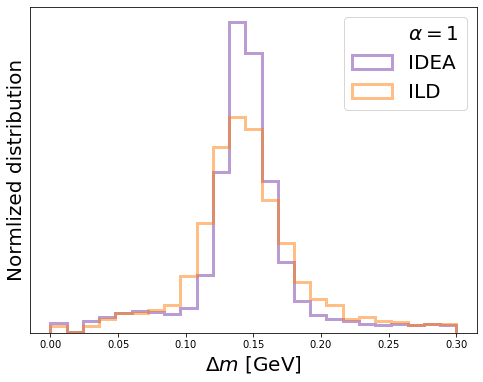

In [46]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[0.0, 0.3]
bins_ = 25

ax1.plot(np.NaN, np.NaN, '-', color='none', label=r"$\alpha=1$")
# ax1.hist(df_train01_['DeltaM'], weights=df_train01_['weight']/(df_train01_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'$\alpha=0.5$', alpha=0.5);
# ax1.hist(df_train05_['DeltaM'], weights=df_train05_['weight']/(df_train05_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'$\alpha=0.5$', alpha=0.5);
ax1.hist(df_train_['DeltaM'], weights=df_train_['weight']/(df_train_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'IDEA', alpha=0.65, color='C4');
# ax1.hist(df_train2_['DeltaM'], weights=df_train2_['weight']/(df_train2_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'$\alpha=2$', alpha=0.5);


# ax1.hist(df_train_or05_['DeltaM'], weights=df_train_or05_['weight']/(df_train_or05_['weight'].sum()), bins=bins_, range=range_, lw=3, alpha=0.2, color='C0');
ax1.hist(df_train_or_['DeltaM'], weights=df_train_or_['weight']/(df_train_or_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, label=r'ILD', alpha=0.5, color='C1');
# ax1.hist(df_train_or2_['DeltaM'], weights=df_train_or2_['weight']/(df_train_or2_['weight'].sum()), bins=bins_, range=range_, histtype='step', lw=3, alpha=0.5, color='C2', linestyle='--');


ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$\Delta m$ [GeV]', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=1, fontsize=20)

# f.savefig('./figures/Dsdeltam_ILD_IDEA')


In [34]:
# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[0.0, 0.3]
# bins_ = 25

# # ax1.hist(df_train01_['DeltaM'], weights=df_train01_['weight']/(df_train01_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=0.5$', alpha=0.5);
# ax1.hist(df_train05_['DeltaM'], weights=df_train05_['weight']/(df_train05_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=0.5$', alpha=0.5, color='C0');
# ax1.hist(df_train_['DeltaM'], weights=df_train_['weight']/(df_train_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=1$', alpha=0.5, color='C1');
# # ax1.hist(df_train2_['DeltaM'], weights=df_train2_['weight']/(df_train2_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=2$', alpha=0.5, color='C2');

# ax1.hist(df_train_or05_['DeltaM'], weights=df_train_or05_['weight']/(df_train_or05_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, alpha=0.5, color='C0', linestyle='--');
# ax1.hist(df_train_or_['DeltaM'], weights=df_train_or_['weight']/(df_train_or_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, alpha=0.5, color='C1', linestyle='--');
# # ax1.hist(df_train_or2_['DeltaM'], weights=df_train_or2_['weight']/(df_train_or2_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, alpha=0.5, color='C2', linestyle='--');


# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$\Delta m=m(D_s\gamma)-m(D_s)$ [GeV$/c^2$]', fontsize=20)
# ax1.set_yticks([])
# ax1.legend(loc=1, fontsize=20)

# # f.savefig('./figures/Dsdeltam_alphas')


In [35]:
# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[0.0, 0.3]
# bins_ = 25
# # range_=[0.05, 0.25]
# # bins_ = 20

# # ax1.hist(df_train01_['DeltaM'], weights=df_train01_['weight']/(df_train01_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=0.5$', alpha=0.5);
# ax1.hist(df_train05_['DeltaM'], weights=df_train05_['weight']/(df_train05_['weight'].sum()), bins=bins_, range=range_, density=True, lw=3, label=r'$\alpha=0.5$', alpha=0.2, color='C0');
# ax1.hist(df_train_['DeltaM'], weights=df_train_['weight']/(df_train_['weight'].sum()), bins=bins_, range=range_, density=True, lw=3, label=r'$\alpha=1$', alpha=0.2, color='C1');
# # ax1.hist(df_train2_['DeltaM'], weights=df_train2_['weight']/(df_train2_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=2$', alpha=0.5, color='C2');

# ax1.hist(df_train_or05_['DeltaM'], weights=df_train_or05_['weight']/(df_train_or05_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, alpha=0.5, color='C0');
# ax1.hist(df_train_or_['DeltaM'], weights=df_train_or_['weight']/(df_train_or_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, alpha=0.5, color='C1');
# # ax1.hist(df_train_or2_['DeltaM'], weights=df_train_or2_['weight']/(df_train_or2_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, alpha=0.5, color='C2', linestyle='--');


# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$\Delta m=m(D_s\gamma)-m(D_s)$ [GeV$/c^2$]', fontsize=20)
# ax1.set_yticks([])
# ax1.legend(loc=1, fontsize=20)

# # f.savefig('./figures/Dsdeltam_alphas')


In [207]:
# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[0.0, 0.3]
# bins_ = 25
# # range_=[0.05, 0.25]
# # bins_ = 20

# ax1.hist(df_train01_['DeltaM'], weights=df_train01_['weight']/(df_train01_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=0.5$', alpha=0.5);
# ax1.hist(df_train05_['DeltaM'], weights=df_train05_['weight']/(df_train05_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=0.5$', alpha=0.5, color='C0');
# ax1.hist(df_train_['DeltaM'], weights=df_train_['weight']/(df_train_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'IDEA', alpha=0.5, color='C0');
# # ax1.hist(df_train2_['DeltaM'], weights=df_train2_['weight']/(df_train2_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=2$', alpha=0.5, color='C2');

# # ax1.hist(df_train_or05_['DeltaM'], weights=df_train_or05_['weight']/(df_train_or05_['weight'].sum()), bins=bins_, range=range_, density=True, lw=3, alpha=0.2, color='C0');
# # ax1.hist(df_train_or_['DeltaM'], weights=df_train_or_['weight']/(df_train_or_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'ILD', alpha=0.5, color='C1');
# # ax1.hist(df_train_or2_['DeltaM'], weights=df_train_or2_['weight']/(df_train_or2_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, alpha=0.5, color='C2', linestyle='--');


# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$\Delta m=m(D_s\gamma)-m(D_s)$ [GeV$/c^2$]', fontsize=20)
# ax1.set_yticks([])
# ax1.legend(loc=1, fontsize=20)

# # f.savefig('./figures/Dsdeltam_alphas')


In [36]:
# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)
# range_=[0, 0.3]
# bins_ = 25

# # ax1.hist(df_train_or01_['DeltaM'], weights=df_train_or01_['weight']/(df_train_or01_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=0.5$', alpha=0.5);
# ax1.hist(df_train_or05_['DeltaM'], weights=df_train_or05_['weight']/(df_train_or05_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=0.5$', alpha=0.5, color='C0');
# ax1.hist(df_train_or_['DeltaM'], weights=df_train_or_['weight']/(df_train_or_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=1$', alpha=0.5, color='C1');
# ax1.hist(df_train_or2_['DeltaM'], weights=df_train_or2_['weight']/(df_train_or2_['weight'].sum()), bins=bins_, range=range_, histtype='step', density=True, lw=3, label=r'$\alpha=2$', alpha=0.5, color='C2');


# ax1.set_ylabel('Normlized distribution', fontsize=20)
# ax1.set_xlabel(r'$\Delta m=m(D_s\gamma)-m(D_s)$ [GeV$/c^2$]', fontsize=20)
# ax1.set_yticks([])
# ax1.legend(loc=1, fontsize=20)

# # f.savefig('./figures/Dsdeltam_alphas')
